In [1]:
import os
import sys
import pandas as pd
import numpy as np
import re

current_dir = os.path.dirname(os.getcwd())
sys.path.append(current_dir)

In [2]:
from extract_kilter_holds import ExtractKilterHolds
from node_feature_extractor import NodeFeatureExtractor
from climb_data_processing import ClimbDataProcessor

In [3]:
raw_data_dir = os.path.join(os.path.dirname(os.getcwd()), 'raw')

climb_processor = ClimbDataProcessor(raw_data_dir=raw_data_dir)

climb_processor.load_and_merge_data()
climb_processor.filter_gecko_board()

Loading and merging raw data...
Initial merged DataFrame shape: (293113, 25)
Filtering data for Gecko Board...
Filtered Gecko Board DataFrame shape: (2586, 11)


In [4]:
climb_processor.prepare_similarity_dataframe()

Preparing DataFrame for similarity analysis...
Similarity DataFrame prepared with shape: (847, 4)


In [5]:
climb_processor.calculate_similarity_matrix()

Starting similarity matrix calculation for 847 rows...
Processing row 0 of 847...
Processing row 100 of 847...
Processing row 200 of 847...
Processing row 300 of 847...
Processing row 400 of 847...
Processing row 500 of 847...
Processing row 600 of 847...
Processing row 700 of 847...
Processing row 800 of 847...
Similarity matrix calculation complete.


In [6]:
climb_processor.find_high_similarity_pairs(threshold=0.5)

Finding high similarity pairs with threshold >= 0.50...
Found 202 pairs above the threshold.


[('eb1ef3edf08647a3984a8b0b135eb2e6',
  '3a294739fbcb4eb183b75fb7bc5693a6',
  np.float32(1.0)),
 ('B88AC542060D4F6A846022C99C9F30ED',
  '61d6db3e9fa44640ab2f437e9d0a42b4',
  np.float32(1.0)),
 ('b152682cf4564107b2c551a3ad873546',
  '43148FFCE74542F2924E52D161EA8DCF',
  np.float32(1.0)),
 ('8C912F7EE2284AA49AAE81F4E2D0FE6F',
  '605f2bab06d34dd3a7b968718b07b254',
  np.float32(1.0)),
 ('D0E5387D5B974D38B4E93FC4DFD61EF6',
  '5631e4baede24b739083476c2ea42d7a',
  np.float32(0.8888889)),
 ('5c25e9e7f4ef45cab3314ae1b31bea9d',
  '13e743fc61444ab18b52fc67c23e10b8',
  np.float32(0.85714287)),
 ('2105A3B1744E48FAA84E7E7A66D92F79',
  '2754b5ebc982429ebf529124217c59dc',
  np.float32(0.85714287)),
 ('32B0C89C664C48938CD6BE58013A6CB5',
  '08b369e237204dd6a446c6605a93eabb',
  np.float32(0.8333333)),
 ('CABC605922A54205BD812FCB6068DB1D',
  'E66ECE4AADF6412B8A426CF43738DB71',
  np.float32(0.8181818)),
 ('B4829A7E28EB401AB7A8CC7FACB45B23',
  'ff26283c81cf4b67a74fed880ea55b9a',
  np.float32(0.8181818)),
 (

In [7]:
climb_processor.deduplicate_by_quality_score()


--- Deduplication by Quality Score ---
Initial number of climbs: 2586
Number of climbs removed: 303
Final number of climbs: 2283


In [8]:
climb_processor.drop_too_many_holds()

Starting 'drop_too_many_holds' on DataFrame of shape: (2283, 11)
Dropped 0 rows.
Final DataFrame shape: (2283, 11)


In [21]:
holds = ExtractKilterHolds(raw_data_dir)

Climb hold colors reset to default.
Climb hold type reset to default.
Data loaded and preprocessed successfully.


In [ ]:
processed_folder_path = os.path.join(os.path.dirname(os.getcwd()), 'processed', 'climbs')


i = 1
one_climb_data = climb_processor.df_gecko_climb_data.iloc[i]
holds.apply_climb(one_climb_data['frames'])

csv_path = os.path.join(processed_folder_path, one_climb_data['uuid'] + '.csv')
holds.save_current_board_to_csv(csv_path)

Climb hold colors reset to default.
Climb hold type reset to default.
Custom colors and types applied.
Current board data saved to c:\Users\mdaman\CodeProjects\ai_Kilter_Routes\data\processed\climbs\0A9FCEC30E464F59AE7B1B7E10A3F691.csv


Climb hold colors reset to default.
Climb hold type reset to default.
Data loaded and preprocessed successfully.
Climb hold colors reset to default.
Climb hold type reset to default.
Custom colors and types applied.


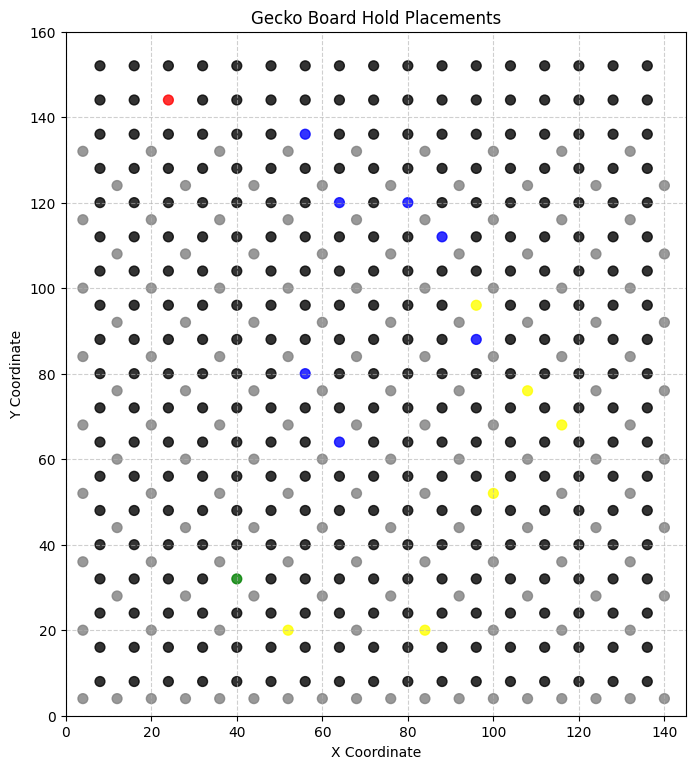

dumpling sauce (spicy)


In [47]:
holds = ExtractKilterHolds(raw_data_dir)


i = 1
my_string = climb_processor.df_gecko_climb_data['frames'][i]

holds.apply_climb(my_string)

holds.plot_gecko_board()

print(climb_processor.df_gecko_climb_data['name'][i])

Loaded data from climbing route dataframe
Filtered data for Gecko board.
Normalized 'x' and 'y' coordinates.
One-hot encoded categorical columns: ['default_hold_color', 'climb_hold_type']
Populated node features dictionary.
Created node feature dataframe and matrix.


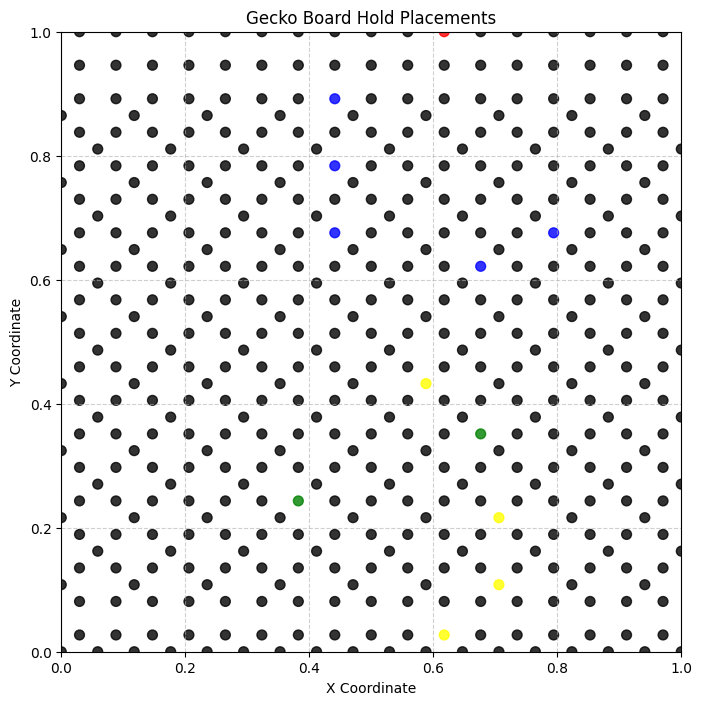

In [11]:
extractor = NodeFeatureExtractor(holds.gecko_board_df)
extractor.plot_board()